
# California Community College Student Enrollment  -<br /> Pre & Post Covid-19 Pandemic Analysis

### INTRODUCTION


**Description:**   The primary objective of this project is to conduct an analysis of a dataset obtained from the California Chancellor's Office. The dataset encompasses the enrollment data of Full-Time Equivalent Students (FTES) in all community colleges across California during the academic years spanning from 2016 & 2017 through 2022 & 2023. Through examination of various student enrollment trends over the years, our aim is to determine whether the Covid-19 pandemic had a discernible impact on student enrollment patterns within California's community colleges. Using data analysis, we can also distinguish the composition of students enrolled in different community colleges across the state over the years.

**Context Notes:**   FTES stands for "full-time equivalent students," who are students enrolled for a minimum of 15 hours per week during a given semester. For example, if an individual takes only a 5-unit class in a quarter, they would be accounted for as 1/3 of a FTES because 15 units are considered full time. The FTES value is computed by dividing the total student contact hours (TSCH) by 525, which represents the total number of full-time equivalent hours.<br>

    FTES = Total Student Contact Hours ÷ 525

**Sources**:
* California Chancellor's Office -- [source](https://datamart.cccco.edu/Students/FTES_Summary.aspx)
<br> => filter: Annual Search - Terms: 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023 - Credit & Non-Credit, Transfer, Vocational - College Name


### IMPORT LIBRARIES & DATASET

The dataset from the [California Chancelor's Office](https://datamart.cccco.edu/Students/FTES_Summary.aspx) contains enrollment information of every community colleges in California.<br>We will do a preliminary reading to clean the dataset to be usable for data analysis.

In [6]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")
from matplotlib.ticker import StrMethodFormatter

In [7]:
# preliminary reading of the dataset into a Pandas DataFrame
student_enrollment_prelim_DF = pd.read_csv('CC_FTES_enrollment_16_23.csv')
print("California Community Colleges Student Enrollment DataFrame [Preliminary View]:")
student_enrollment_prelim_DF

California Community Colleges Student Enrollment DataFrame [Preliminary View]:


,Unnamed: 0,Unnamed: 1,Annual 2016-2017,Annual 2016-2017.1,Annual 2016-2017.2,Annual 2016-2017.3,Annual 2016-2017.4,Annual 2016-2017.5,Annual 2016-2017.6,Annual 2017-2018,...,Annual 2021-2022.4,Annual 2021-2022.5,Annual 2021-2022.6,Annual 2022-2023,Annual 2022-2023.1,Annual 2022-2023.2,Annual 2022-2023.3,Annual 2022-2023.4,Annual 2022-2023.5,Annual 2022-2023.6
0,State Name,College Name,Transferable Credit FTES,Credit FTES,Non-Credit FTES,Total FTES,Vocational Education Credit FTES,Vocational Education Non Credit FTES,Vocational Education Total FTES,Transferable Credit FTES,...,Vocational Education Credit FTES,Vocational Education Non Credit FTES,Vocational Education Total FTES,Transferable Credit FTES,Credit FTES,Non-Credit FTES,Total FTES,Vocational Education Credit FTES,Vocational Education Non Credit FTES,Vocational Education Total FTES
1,State of California,Alameda,"2,865.40","3,628.11",49.95,"3,678.06",848.69,0.74,849.43,"3,058.23",...,636.61,6.43,643.04,"2,365.74","2,750.46",99.46,"2,849.92",694.75,6.50,701.25
2,State of California,Allan Hancock,"7,094.62","9,408.65",949.76,"10,358.41","3,527.38",273.18,"3,800.55","6,980.97",...,"3,046.12",94.14,"3,140.26","6,387.67","7,944.01",569.59,"8,513.60","3,335.69",115.06,"3,450.75"
3,State of California,American River,"14,148.12","21,921.99",39.26,"21,961.24","8,782.15",0.00,"8,782.15","13,685.71",...,"7,238.31",0.00,"7,238.31","12,261.23","18,945.60",0.00,"18,945.60","9,276.61",0.00,"9,276.61"
4,State of California,Antelope Valley,"8,455.22","10,834.68",71.78,"10,906.46","2,751.13",0.00,"2,751.13","8,424.37",...,"2,465.29",6.64,"2,471.93","7,691.37","8,913.80",55.80,"8,969.60","2,947.73",7.22,"2,954.95"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,State of California,West Hills Lemoore,"2,505.70","3,119.20",339.16,"3,458.37",668.68,0.00,668.68,"2,731.28",...,572.02,1.03,573.05,"2,500.74","2,633.94",20.69,"2,654.63",598.10,0.84,598.94
117,State of California,West LA,"6,339.98","7,524.97",371.09,"7,896.06","2,591.63",3.53,"2,595.16","6,732.30",...,"2,080.84",14.15,"2,094.99","4,981.76","5,420.91",147.42,"5,568.33","2,129.47",26.74,"2,156.21"
118,State of California,West Valley,"5,400.83","6,180.44",516.69,"6,697.13","1,333.29",0.64,"1,333.93","5,282.97",...,"1,197.08",130.50,"1,327.57","4,999.48","5,090.10",554.10,"5,644.20","1,183.11",151.67,"1,334.78"
119,State of California,Woodland,"2,312.78","2,767.98",19.24,"2,787.22",616.79,0.00,616.79,"2,102.81",...,547.14,0.00,547.14,"2,125.75","2,272.55",59.98,"2,332.54",620.47,0.50,620.97


### DATA CLEANING

In [8]:
# clean up data: drop unnecessary columns, clean up column labels, and row indices

# drop the first column 'Unnamed:0' since it has "State of California" for all entries
student_enrollment_prelim_DF.drop(student_enrollment_prelim_DF.columns[0], axis=1, inplace=True)

# combine DataFrame column name with first row to combine year and type of FTES enrollment for new column name
year_label = [col.split('.')[0] for col in student_enrollment_prelim_DF.columns]
category_label = student_enrollment_prelim_DF.iloc[0]
student_enrollment_prelim_DF.columns = [f"{year} {category}" for year, category in zip(year_label, category_label)]
student_enrollment_prelim_DF = student_enrollment_prelim_DF.drop(student_enrollment_prelim_DF.index[0])

# simplify column names for readability
student_enrollment_prelim_DF.columns = student_enrollment_prelim_DF.columns.str.extract('([^Annual]+.*[^FTES])',expand=False)
student_enrollment_prelim_DF.columns = student_enrollment_prelim_DF.columns.str.replace('Education', '')

# set index as college names
student_enrollment_prelim_DF.rename(columns={'Unnamed: 1 College Name': ' '}, inplace=True)
student_enrollment_prelim_DF = student_enrollment_prelim_DF.set_index(student_enrollment_prelim_DF.columns[0])

# drop columns that show Credit/Non-credit, save just the total
cols = []
for i in range(0, len(student_enrollment_prelim_DF.columns), 7):
    cols.append(i)
    cols.append(i+3)
    cols.append(i+6)

# make a view of just the selected columns
student_enrollment_prelim_DF = student_enrollment_prelim_DF[student_enrollment_prelim_DF.columns[cols]]
student_enrollment_prelim_DF

,2016-2017 Transferable Credit,2016-2017 Total,2016-2017 Vocational Total,2017-2018 Transferable Credit,2017-2018 Total,2017-2018 Vocational Total,2018-2019 Transferable Credit,2018-2019 Total,2018-2019 Vocational Total,2019-2020 Transferable Credit,...,2019-2020 Vocational Total,2020-2021 Transferable Credit,2020-2021 Total,2020-2021 Vocational Total,2021-2022 Transferable Credit,2021-2022 Total,2021-2022 Vocational Total,2022-2023 Transferable Credit,2022-2023 Total,2022-2023 Vocational Total
,,,,,,,,,,,,,,,,,,,,,
Alameda,"2,865.40","3,678.06",849.43,"3,058.23","3,805.60",907.10,"3,006.64","3,626.70",863.55,"2,911.00",...,867.21,"2,591.51","3,027.45",689.95,"2,140.06","2,581.36",643.04,"2,365.74","2,849.92",701.25
Allan Hancock,"7,094.62","10,358.41","3,800.55","6,980.97","10,053.89","3,666.84","7,047.29","9,881.01","3,586.51","7,385.40",...,"3,543.32","6,479.83","8,302.41","2,832.51","6,100.44","8,184.19","3,140.26","6,387.67","8,513.60","3,450.75"
American River,"14,148.12","21,961.24","8,782.15","13,685.71","22,098.89","9,377.21","14,196.56","23,544.05","11,051.61","14,459.08",...,"9,858.14","13,361.98","16,870.91","5,607.87","12,274.61","17,175.66","7,238.31","12,261.23","18,945.60","9,276.61"
Antelope Valley,"8,455.22","10,906.46","2,751.13","8,424.37","11,069.41","2,805.49","8,702.46","11,085.00","2,971.20","9,502.42",...,"3,222.86","8,043.05","9,278.45","2,683.22","7,179.74","8,326.93","2,471.93","7,691.37","8,969.60","2,954.95"
Bakersfield,"11,616.45","15,526.00","4,567.71","12,708.11","17,033.64","4,971.16","13,035.64","18,272.06","5,238.26","15,028.14",...,"5,699.83","14,786.86","18,701.66","5,798.47","13,792.95","17,055.24","5,688.57","9,797.02","10,820.92","3,258.98"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Hills Lemoore,"2,505.70","3,458.37",668.68,"2,731.28","3,606.55",663.10,"2,687.92","3,494.11",647.47,"2,870.73",...,635.42,"2,553.54","2,725.20",633.54,"2,257.82","2,570.14",573.05,"2,500.74","2,654.63",598.94
West LA,"6,339.98","7,896.06","2,595.16","6,732.30","8,034.99","2,536.90","7,120.11","8,489.88","2,774.33","7,476.78",...,"2,910.94","6,512.43","7,275.18","2,396.90","5,588.71","6,248.74","2,094.99","4,981.76","5,568.33","2,156.21"
West Valley,"5,400.83","6,697.13","1,333.93","5,282.97","6,241.78","1,195.82","5,495.27","6,566.24","1,265.13","5,747.57",...,"1,321.50","5,518.68","5,946.88","1,464.44","4,805.51","5,320.74","1,327.57","4,999.48","5,644.20","1,334.78"


In [9]:
# check for NaN in the cleaned DataFrame
print("Check for NaN values:")
display(student_enrollment_prelim_DF[student_enrollment_prelim_DF.isna().any(axis=1)]) 
# drop NaN's
Cali_CC_student_enrollment_DF = student_enrollment_prelim_DF.dropna()

Check for NaN values:


,2016-2017 Transferable Credit,2016-2017 Total,2016-2017 Vocational Total,2017-2018 Transferable Credit,2017-2018 Total,2017-2018 Vocational Total,2018-2019 Transferable Credit,2018-2019 Total,2018-2019 Vocational Total,2019-2020 Transferable Credit,...,2019-2020 Vocational Total,2020-2021 Transferable Credit,2020-2021 Total,2020-2021 Vocational Total,2021-2022 Transferable Credit,2021-2022 Total,2021-2022 Vocational Total,2022-2023 Transferable Credit,2022-2023 Total,2022-2023 Vocational Total
,,,,,,,,,,,,,,,,,,,,,
CalBright,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,...,28.23,0.00,260.54,171.40,0.00,491.14,373.71,0.00,581.69,434.07
LA ITV,365.01,665.02,0.00,58.11,131.78,0.00,32.47,60.56,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Madera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"2,139.08","2,280.99",539.64,"2,565.45","2,759.63",718.48,"2,775.52","2,911.87",774.90
San Francisco Ctrs,0.00,"5,537.90",875.37,0.00,"5,865.19","1,113.42",0.00,"4,980.31",949.05,0.00,...,649.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


    NOTE: For the purpose of this project, we will drop the four community colleges: CalBright, LA ITV, Madera, and San Franci-sco Ctrs from the dataset. As they contain NaN values, they could have an impact on our analysis. The NaN values are evident in most of the years throughout each record and thus these records show no value to the analysis of the dataset. 

In [10]:
# convert all columns to numpy
Cali_CC_student_enrollment_DF = Cali_CC_student_enrollment_DF.replace({',': ''}, regex=True).astype('float64')
print("California Community Colleges Student Enrollment DataFrame [Cleaned View]:")
pd.set_option('display.float_format', '{:.2f}'.format)
Cali_CC_student_enrollment_DF

California Community Colleges Student Enrollment DataFrame [Cleaned View]:


,2016-2017 Transferable Credit,2016-2017 Total,2016-2017 Vocational Total,2017-2018 Transferable Credit,2017-2018 Total,2017-2018 Vocational Total,2018-2019 Transferable Credit,2018-2019 Total,2018-2019 Vocational Total,2019-2020 Transferable Credit,...,2019-2020 Vocational Total,2020-2021 Transferable Credit,2020-2021 Total,2020-2021 Vocational Total,2021-2022 Transferable Credit,2021-2022 Total,2021-2022 Vocational Total,2022-2023 Transferable Credit,2022-2023 Total,2022-2023 Vocational Total
,,,,,,,,,,,,,,,,,,,,,
Alameda,2865.40,3678.06,849.43,3058.23,3805.60,907.10,3006.64,3626.70,863.55,2911.00,...,867.21,2591.51,3027.45,689.95,2140.06,2581.36,643.04,2365.74,2849.92,701.25
Allan Hancock,7094.62,10358.41,3800.55,6980.97,10053.89,3666.84,7047.29,9881.01,3586.51,7385.40,...,3543.32,6479.83,8302.41,2832.51,6100.44,8184.19,3140.26,6387.67,8513.60,3450.75
American River,14148.12,21961.24,8782.15,13685.71,22098.89,9377.21,14196.56,23544.05,11051.61,14459.08,...,9858.14,13361.98,16870.91,5607.87,12274.61,17175.66,7238.31,12261.23,18945.60,9276.61
Antelope Valley,8455.22,10906.46,2751.13,8424.37,11069.41,2805.49,8702.46,11085.00,2971.20,9502.42,...,3222.86,8043.05,9278.45,2683.22,7179.74,8326.93,2471.93,7691.37,8969.60,2954.95
Bakersfield,11616.45,15526.00,4567.71,12708.11,17033.64,4971.16,13035.64,18272.06,5238.26,15028.14,...,5699.83,14786.86,18701.66,5798.47,13792.95,17055.24,5688.57,9797.02,10820.92,3258.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Hills Lemoore,2505.70,3458.37,668.68,2731.28,3606.55,663.10,2687.92,3494.11,647.47,2870.73,...,635.42,2553.54,2725.20,633.54,2257.82,2570.14,573.05,2500.74,2654.63,598.94
West LA,6339.98,7896.06,2595.16,6732.30,8034.99,2536.90,7120.11,8489.88,2774.33,7476.78,...,2910.94,6512.43,7275.18,2396.90,5588.71,6248.74,2094.99,4981.76,5568.33,2156.21
West Valley,5400.83,6697.13,1333.93,5282.97,6241.78,1195.82,5495.27,6566.24,1265.13,5747.57,...,1321.50,5518.68,5946.88,1464.44,4805.51,5320.74,1327.57,4999.48,5644.20,1334.78


### DATA ANALYSIS

Analyze the 'total enrollment' trend for the 7 years(2016 & 2017 and 2022 & 2023) for each category of student enrollments: transfer, general, vocational.

<b> Total Transferable FTES:

In [11]:
# Transferable column is every 0th and every 3rd column, for the 7 years
col = [] 
for i in range(0,len(Cali_CC_student_enrollment_DF.columns),3):
    col.append(i)
    
transferable_DataFrame = Cali_CC_student_enrollment_DF[Cali_CC_student_enrollment_DF.columns[col]]
# change the index so it contains the years only 
transferable_DataFrame.columns = transferable_DataFrame.columns.str.extract('([0-9]+-[0-9]+)',expand=False)

print("Transferable Total Enrollment:")
display(transferable_DataFrame)
print("Transferable Total Enrollment by Year:")
transferable_DataFrame.sum()

Transferable Total Enrollment:


,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
,,,,,,,
Alameda,2865.40,3058.23,3006.64,2911.00,2591.51,2140.06,2365.74
Allan Hancock,7094.62,6980.97,7047.29,7385.40,6479.83,6100.44,6387.67
American River,14148.12,13685.71,14196.56,14459.08,13361.98,12274.61,12261.23
Antelope Valley,8455.22,8424.37,8702.46,9502.42,8043.05,7179.74,7691.37
Bakersfield,11616.45,12708.11,13035.64,15028.14,14786.86,13792.95,9797.02
...,...,...,...,...,...,...,...
West Hills Lemoore,2505.70,2731.28,2687.92,2870.73,2553.54,2257.82,2500.74
West LA,6339.98,6732.30,7120.11,7476.78,6512.43,5588.71,4981.76
West Valley,5400.83,5282.97,5495.27,5747.57,5518.68,4805.51,4999.48


Transferable Total Enrollment by Year:


2016-2017   896691.09
2017-2018   908686.41
2018-2019   926712.44
2019-2020   961908.05
2020-2021   907335.52
2021-2022   816676.37
2022-2023   827054.36
dtype: float64

<b> Total General (Credit/Non-credit) FTES:

In [12]:
# General column is every 1st and every 3rd column, for the 7 years
col = [] 
for i in range(1,len(Cali_CC_student_enrollment_DF.columns),3):
    col.append(i)
    
general_DataFrame = Cali_CC_student_enrollment_DF[Cali_CC_student_enrollment_DF.columns[col]]
# change the index so it contains the years only 
general_DataFrame.columns = general_DataFrame.columns.str.extract('([0-9]+-[0-9]+)',expand=False)

print("General Total Enrollment:")
display(general_DataFrame)
print("General Total Enrollment by Year:")
general_DataFrame.sum()

General Total Enrollment:


,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
,,,,,,,
Alameda,3678.06,3805.60,3626.70,3406.87,3027.45,2581.36,2849.92
Allan Hancock,10358.41,10053.89,9881.01,9745.82,8302.41,8184.19,8513.60
American River,21961.24,22098.89,23544.05,22036.45,16870.91,17175.66,18945.60
Antelope Valley,10906.46,11069.41,11085.00,11064.76,9278.45,8326.93,8969.60
Bakersfield,15526.00,17033.64,18272.06,18907.27,18701.66,17055.24,10820.92
...,...,...,...,...,...,...,...
West Hills Lemoore,3458.37,3606.55,3494.11,3496.37,2725.20,2570.14,2654.63
West LA,7896.06,8034.99,8489.88,8477.15,7275.18,6248.74,5568.33
West Valley,6697.13,6241.78,6566.24,6406.71,5946.88,5320.74,5644.20


General Total Enrollment by Year:


2016-2017   1177088.06
2017-2018   1182955.87
2018-2019   1172343.52
2019-2020   1145874.64
2020-2021   1063057.56
2021-2022    971180.49
2022-2023    993257.77
dtype: float64

<b> Total Vocational (Credit/Non-credit) FTES:

In [13]:
# Vocational column is every 2nd column and every 3rd column after, for the 7 years
col = [] 
for i in range(2,len(Cali_CC_student_enrollment_DF.columns),3):
    col.append(i)
    
vocational_DataFrame = Cali_CC_student_enrollment_DF[Cali_CC_student_enrollment_DF.columns[col]]
# change the index so it contains the years only 
vocational_DataFrame.columns = vocational_DataFrame.columns.str.extract('([0-9]+-[0-9]+)',expand=False)

print("Vocational Total Enrollment:")
display(vocational_DataFrame)
print("Vocational Total Enrollment by Year:")
vocational_DataFrame.sum()

Vocational Total Enrollment:


,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
,,,,,,,
Alameda,849.43,907.10,863.55,867.21,689.95,643.04,701.25
Allan Hancock,3800.55,3666.84,3586.51,3543.32,2832.51,3140.26,3450.75
American River,8782.15,9377.21,11051.61,9858.14,5607.87,7238.31,9276.61
Antelope Valley,2751.13,2805.49,2971.20,3222.86,2683.22,2471.93,2954.95
Bakersfield,4567.71,4971.16,5238.26,5699.83,5798.47,5688.57,3258.98
...,...,...,...,...,...,...,...
West Hills Lemoore,668.68,663.10,647.47,635.42,633.54,573.05,598.94
West LA,2595.16,2536.90,2774.33,2910.94,2396.90,2094.99,2156.21
West Valley,1333.93,1195.82,1265.13,1321.50,1464.44,1327.57,1334.78


Vocational Total Enrollment by Year:


2016-2017   316717.79
2017-2018   323508.91
2018-2019   326874.44
2019-2020   324201.81
2020-2021   293111.43
2021-2022   285528.43
2022-2023   296258.88
dtype: float64

### DATA ANALYSIS & VISUALIZATION (using Matplotlib)

<b><i><u>Line Plot to show the enrollment trend over the 7 years...

,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
Transfer,896691.090000,908686.410000,926712.440000,961908.050000,907335.520000,816676.370000,827054.360000
General,1177088.060000,1182955.870000,1172343.520000,1145874.640000,1063057.560000,971180.490000,993257.770000
Vocational,316717.790000,323508.910000,326874.440000,324201.810000,293111.430000,285528.430000,296258.880000


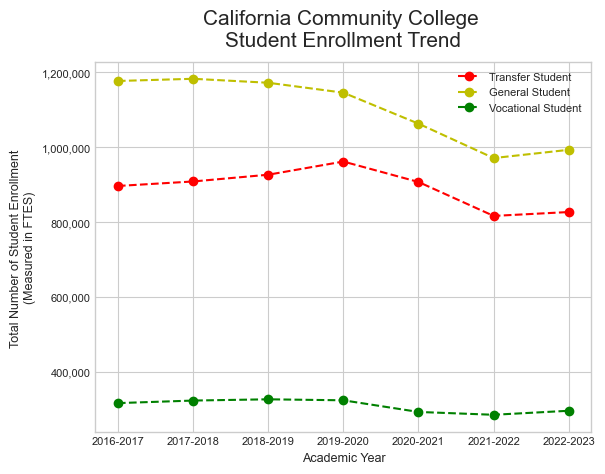

In [14]:
fig = plt.figure()
plt.title("California Community College \nStudent Enrollment Trend",fontsize=15,y=1.02)
plt.xlabel("Academic Year",fontsize=9)
plt.ylabel("Total Number of Student Enrollment \n(Measured in FTES)",fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# make dataFrames out of the 3 totals
FTES_dataframe = pd.concat([transferable_DataFrame.sum(), general_DataFrame.sum(), vocational_DataFrame.sum()], axis=1)

# set columns to Transfer, General, Vocational
FTES_dataframe.columns = ['Transfer','General','Vocational']

index = FTES_dataframe.index
pd.set_option('float_format', '{:f}'.format)
plt.plot(index,FTES_dataframe['Transfer'] , 'ro--', label='Transfer Student')
plt.plot(index,FTES_dataframe['General'] , 'yo--', label='General Student')
plt.plot(index,FTES_dataframe['Vocational'] , 'go--', label='Vocational Student')
plt.legend(fontsize=8)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

FTES_dataframe = FTES_dataframe.transpose()
FTES_dataframe

<b><u>Line Plot Observation & Analysis:
    
The line plot above clearly illustrates that enrollment numbers were significantly higher for general and transfer students compared to vocational students. This disparity can be attributed to the nature of California Community Colleges, which cater to a diverse range of students with various interests. Unlike private colleges and UCs, which focus on specialized majors and programs, community colleges offer a wide variety of classes for students with general interests in learning multiple subjects. Additionally, community colleges provide tag programs, allowing students to take transferable classes as a pathway to earning a bachelor's degree at a four-year college. These abundant options at community colleges likely contribute to the higher enrollment of transfer and general students in the dataset.

The line plot also demonstrates a decrease in total student enrollment for all three categories of students during the three-year period from 2019-2020 to 2021-2022. Given that this data reflects real-world trends, it is reasonable to consider the impact of the Covid-19 pandemic, which peaked in 2019-2020 and gradually eased out by 2021-2022, on students attending or planning to attend community colleges. The plot clearly indicates that all three categories of students experienced declining enrollment during the pandemic years. Notably, comparing the school year 2018-2019 with 2021-2022, both transfer student and general student enrollments have decreased significantly. While vocational student enrollment has also seen a slight decrease during this period, it is relatively smaller compared to transfer and general students. The pandemic's negative effect on student enrollment is evident across all categories. However, as the pandemic has subsided and the general public has become more open, there is a notable increase in total enrollment trends from 2021-2022 to 2022-2023 for all three categories. This uptick could potentially foreshadow a resurgence of students enrolling in California Community Colleges.

<b><u>Analysis of Enrollment Change: Pre-Pandemic & Post-Pandemic
    
* Calculate percent change in total enrollment for each school between 2 years before the pandemic (2017-2018) and  years after the height of the pandemic (2022-2023).
* Find the total enrollment for each school.
    

In [21]:
# Find the total for the year 2016-2017
totalEnrollment_2016_2017 = Cali_CC_student_enrollment_DF.iloc[:,0:3].sum(axis=1)

# Find the total for the year 2022-2023
totalEnrollment_2022_2023 = Cali_CC_student_enrollment_DF.iloc[:,-3:].sum(axis=1)

# Combine two to create new DataFrame
enrollmentChange_DataFrame = pd.concat([totalEnrollment_2016_2017, totalEnrollment_2022_2023], axis=1)
enrollmentChange_DataFrame.columns = ['2016-2017', '2022-2023']
print("Total Enrollment for each Community College \n(2016-2017 & 2022-2023):")
enrollmentChange_DataFrame

Total Enrollment for each Community College 
(2016-2017 & 2022-2023):


,2016-2017,2022-2023
,,
Alameda,7392.890000,5916.910000
Allan Hancock,21253.580000,18352.020000
American River,44891.510000,40483.440000
Antelope Valley,22112.810000,19615.920000
Bakersfield,31710.160000,23876.920000
...,...,...
West Hills Lemoore,6632.750000,5754.310000
West LA,16831.200000,12706.300000
West Valley,13431.890000,11978.460000


<b><u> Compare the top 10 community colleges' total enrollment from academic years 2016-2017 & 2022-2023

In [22]:
print("Top Ten schools with largest enrollment in 2016 - 2017:")
enrollmentChange_DataFrame.sort_values(by='2016-2017',ascending=False).head(10)

Top Ten schools with largest enrollment in 2016 - 2017:


,2016-2017,2022-2023
,,
Mt San Antonio,60964.420000,61899.980000
Pasadena,53529.930000,39481.010000
Santa Monica,52569.660000,41945.160000
Fullerton,49168.900000,31174.240000
East LA,47231.980000,38032.350000
American River,44891.510000,40483.440000
Palomar,41058.110000,31110.480000
Santa Ana,40847.580000,50415.530000
Orange Coast,40075.420000,33046.690000


In [17]:
print("Top Ten schools with largest enrollment in 2022 - 2023:")
enrollmentChange_DataFrame.sort_values(by='2022-2023',ascending=False).head(10)

Top Ten schools with largest enrollment in 2022 - 2023:


,2016-2017,2022-2023
,,
Cerritos,37457.370000,82256.620000
Mt San Antonio,60964.420000,61899.980000
Santa Ana,40847.580000,50415.530000
El Camino,38450.540000,43511.250000
Santa Monica,52569.660000,41945.160000
American River,44891.510000,40483.440000
Long Beach,39488.480000,40232.150000
Pasadena,53529.930000,39481.010000
Fresno City,37190.620000,38412.770000


<b>Analysis:</b> The Top 10 Schools for academic year 2016-2017 is very different from year 2022-2023.<br>7 out of 10 schools stayed in the top 10: Mt. San Antonio, Santa Ana, Pasadena, East LA, American River, Santa Ana, Long Beach. And couple schools like Cerritos and Santa Ana had a significant increase. 

<b><u>Using the data above, we can calculate the percent change of total enrollment 2 years pre-pandemic and 2 years post pandemic.</u></b>
* <i>Percent change = (new value - original value) / original value * 100</i>
    
    
    

In [18]:
percent_change = (totalEnrollment_2022_2023 - totalEnrollment_2016_2017)/ totalEnrollment_2022_2023 * 100
# print(percent_change)

print("Percent change in student enrollment for CC colleges \nAcademic Years 2018-2019 & 2021-2022:")
percentChange_DataFrame = pd.DataFrame(percent_change, columns = ['Percent Change'])
percentChange_DataFrame

Percent change in student enrollment for CC colleges 
Academic Years 2018-2019 & 2021-2022:


,Percent Change
,
Alameda,-24.945115
Allan Hancock,-15.810576
American River,-10.888576
Antelope Valley,-12.728896
Bakersfield,-32.806744
...,...
West Hills Lemoore,-15.265775
West LA,-32.463424
West Valley,-12.133697


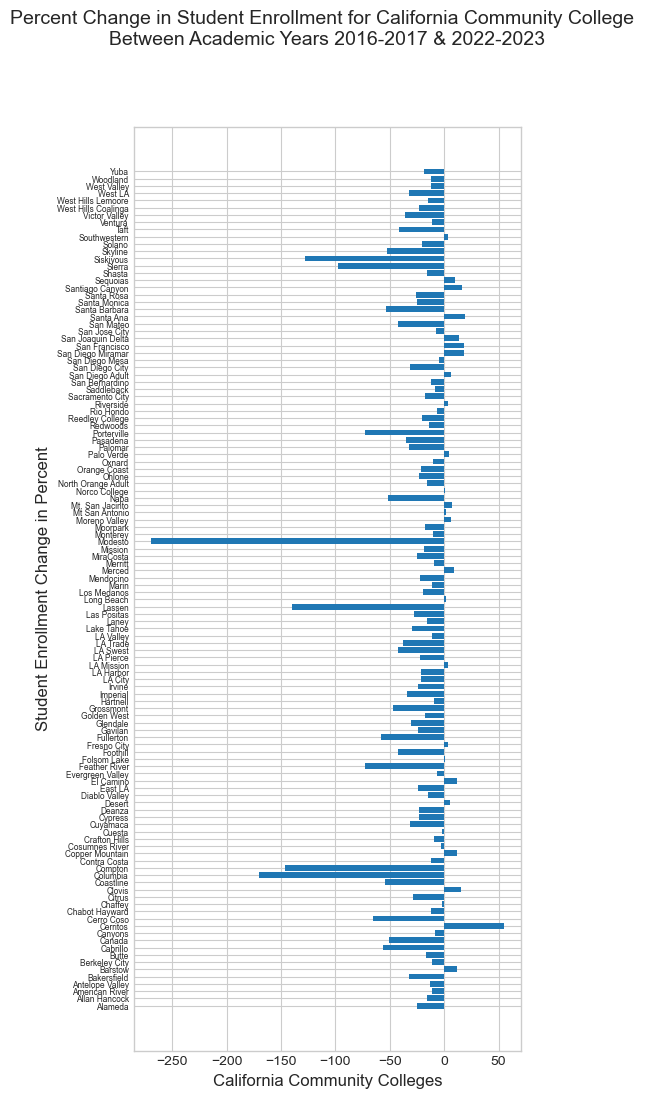

In [28]:
# use bar chart to show enrollment change of the schools 
fig = plt.figure(figsize=(5,12))

plt.title("Percent Change in Student Enrollment for California Community College  \nBetween Academic Years 2016-2017 & 2022-2023",fontsize=14,y=1.08)
plt.xlabel("California Community Colleges",fontsize=12)
plt.ylabel("Student Enrollment Change in Percent",fontsize=12)
plt.barh(percentChange_DataFrame.index.values, percentChange_DataFrame['Percent Change'], align="center")
plt.yticks(np.arange(len(percentChange_DataFrame.index.values)), percentChange_DataFrame.index.values, fontsize=6)
plt.show()


In [32]:
display(percentChange_DataFrame[percentChange_DataFrame['Percent Change'] > 0])
print("Number of Colleges with positive percent change:", len(percentChange_DataFrame[percentChange_DataFrame['Percent Change'] > 0]))
print("Total Number of Colleges:", len(percentChange_DataFrame))

,Percent Change
,
Barstow,11.740943
Cerritos,54.462790
Clovis,14.986120
Copper Mountain,11.563917
Desert,4.950536
El Camino,11.630808
Folsom Lake,0.725286
Fresno City,3.181624
LA Mission,3.836782


Number of Colleges with positive percent change: 25
Total Number of Colleges: 116


<b>Bar Chart Observation & Analysis:
    
From the bar chart above, it is evident that most colleges had a negative percent change on the total student enrollment when comparing the two academic years, 2016-2017 and 2022-2023. Out of 116 California community colleges, 91 colleges, or 78 percent of all colleges, had a negative enrollment when comparing those two academic years. Out of the 25 colleges who had a positive impact, 40% of those colleges recorded a positive percent change on the total student enrollment for those years.

<b><u> Check for correlation between class size and change in enrollment.
    

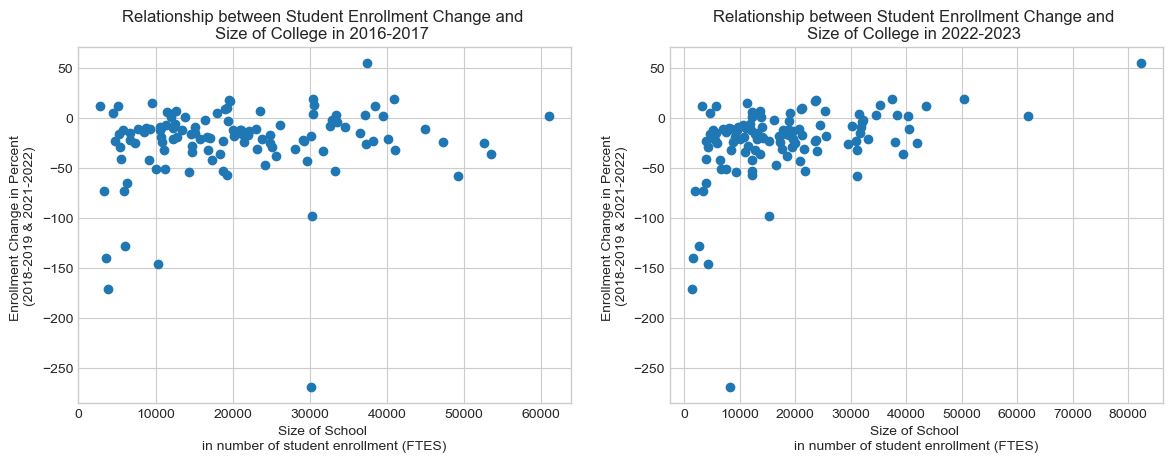

In [20]:
# create 2 subplots 
# to show correlation btwn size of school in first year and change in enrollment & last year and change in enrollment
fig = plt.figure(figsize=(14,4))

# set up the subplot 1
plt.subplot(1,2,1)  # 1 row, 2 cols, subplot 1
plt.subplots_adjust(top=1,wspace=0.2)

# create x and y arrays to plot into scatter plot 
percent  = percentChange_DataFrame['Percent Change'].values
enrollment = totalEnrollment_2016_2017.values
plt.scatter(enrollment,percent)   
plt.title("Relationship between Student Enrollment Change and \nSize of College in 2016-2017 ")
plt.ylabel("Enrollment Change in Percent \n(2018-2019 & 2021-2022)")
plt.xlabel("Size of School \nin number of student enrollment (FTES)")

# set up the subplot 2
plt.subplot(1,2,2)  # 1 row, 2 cols, subplot 1

# create x and y arrays to plot into scatter plot 
percent  = percentChange_DataFrame['Percent Change'].values
enrollment = totalEnrollment_2022_2023.values
plt.scatter(enrollment,percent)   
plt.title("Relationship between Student Enrollment Change and \nSize of College in 2022-2023 ")
plt.ylabel("Enrollment Change in Percent \n(2018-2019 & 2021-2022)")
plt.xlabel("Size of School \nin number of student enrollment (FTES)")
plt.show()


<b>Observation & Analysis:</b> There is no clear correlation between classroom size and the enrollment change. This is strongly evident in the chart on the left, which illustrates that, irrespective of the school size, the enrollment change varies between 10% to -50%. For the year 2022-2023, one might observe that larger classroom sizes tend to exhibit a slight skew towards higher enrollment changes. However, in general, the data is scattered across a wide range of -50% to -10% enrollment change, regardless of the classroom size.


### Conclusions:

Covid-19 Pandemic was a time in our life when things took a brief pause. Most K-12 students had to transition to online learning as . Through observing the student's enrollment trend of California's Community Colleges, we can determine that Covid-19 pandemic took a pause in student's college education as well. It is evident that 